In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Source image

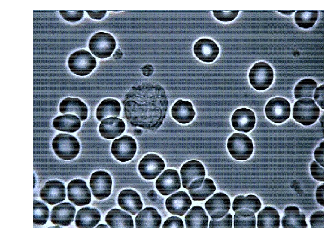

In [2]:
img = cv2.imread('images/1.jpg')
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Blurring  

## 1. Blur (averaging)

This is done by convolving image with a normalized box filter. It simply takes the average of all the pixels under kernel area and replace the central element.

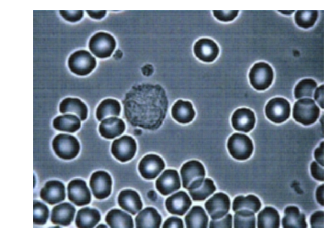

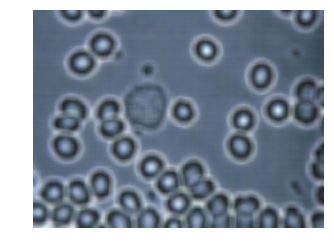

In [3]:
blur = cv2.blur(img, (7,7))
plt.axis('off')
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.figure()

blur = cv2.blur(img, (21,21))
plt.axis('off')
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.show()

## 2. Gaussian Blurring

In this, instead of box filter, gaussian kernel is used. It is done with the function, `cv2.GaussianBlur()`. We should specify the width and height of kernel which should be positive and odd. We also should specify the standard deviation in X and Y direction, sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as same as sigmaX. If both are given as zeros, they are calculated from kernel size. Gaussian blurring is highly effective in removing gaussian noise from the image.

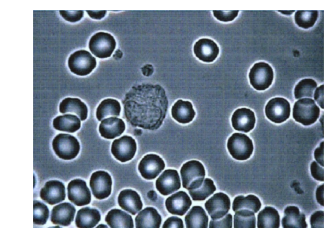

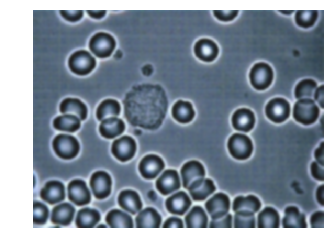

In [4]:
blur = cv2.GaussianBlur(img, (7,7), 0)
plt.axis('off')
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.figure()

blur = cv2.GaussianBlur(img, (21,21), 0)
plt.axis('off')
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.show()

## 3. Median Blurring

Here, the function `cv2.medianBlur()` takes median of all the pixels under kernel area and central element is replaced with this median value. This is highly effective against salt-and-pepper noise in the images. Interesting thing is that, in the above filters, central element is a newly calculated value which may be a pixel value in the image or a new value. But in median blurring, central element is always replaced by some pixel value in the image. It reduces the noise effectively. Its kernel size should be a positive odd integer.

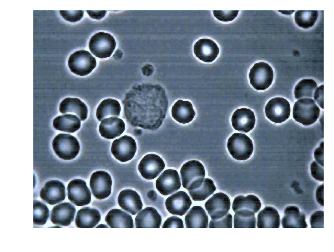

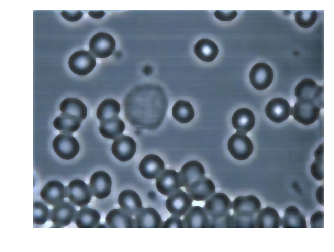

In [5]:
blur = cv2.medianBlur(img, 7)
plt.axis('off')
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.figure()

blur = cv2.medianBlur(img, 21)
plt.axis('off')
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.show()

## 4. Bilateral Filtering

`cv2.bilateralFilter()` is highly effective in noise removal while keeping edges sharp. But the operation is slower compared to other filters. We already saw that gaussian filter takes the a neighbourhood around the pixel and find its gaussian weighted average. This gaussian filter is a function of space alone, that is, nearby pixels are considered while filtering. It doesn’t consider whether pixels have almost same intensity. It doesn’t consider whether pixel is an edge pixel or not. So it blurs the edges also, which we don’t want to do.

Bilateral filter also takes a gaussian filter in space, but one more gaussian filter which is a function of pixel difference. Gaussian function of space make sure only nearby pixels are considered for blurring while gaussian function of intensity difference make sure only those pixels with similar intensity to central pixel is considered for blurring. So it preserves the edges since pixels at edges will have large intensity variation.

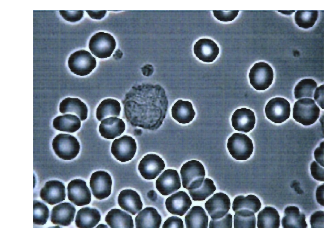

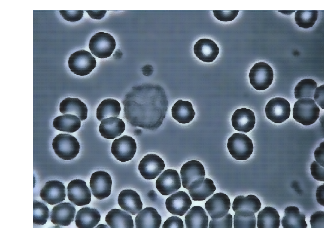

In [6]:
blur = cv2.bilateralFilter(img, 7, 255, 255)
plt.axis('off')
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.figure()

blur = cv2.bilateralFilter(img, 21, 255, 255)
plt.axis('off')
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.show()

## 5. Сombination (median + bilateral)

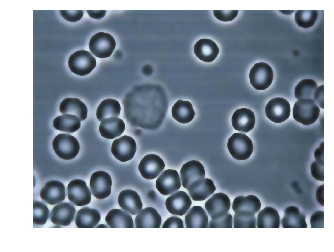

In [7]:
blur = cv2.medianBlur(img, 7)

blur = cv2.bilateralFilter(blur, 21, 255, 255)
plt.axis('off')
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.show()

# Thresholding

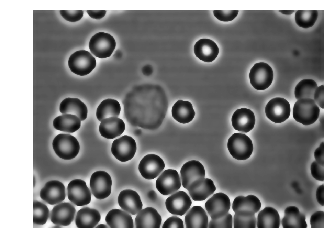

In [8]:
blur = cv2.medianBlur(img, 7)
blur = cv2.bilateralFilter(blur, 21, 255, 255)
grayscale_img = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)

plt.axis('off')
plt.imshow(grayscale_img, 'gray')
plt.show()

## 1. Simple Thresholding

If pixel value is greater than a threshold value, it is assigned one value (may be white), else it is assigned another value (may be black). The function used is `cv2.threshold`. First argument is the source image, which should be a grayscale image. Second argument is the threshold value which is used to classify the pixel values. Third argument is the maxVal which represents the value to be given if pixel value is more than (sometimes less than) the threshold value. OpenCV provides different styles of thresholding and it is decided by the fourth parameter of the function. Different types are:

* `cv2.THRESH_BINARY`
* `cv2.THRESH_BINARY_INV`
* `cv2.THRESH_TRUNC`
* `cv2.THRESH_TOZERO`
* `cv2.THRESH_TOZERO_INV`

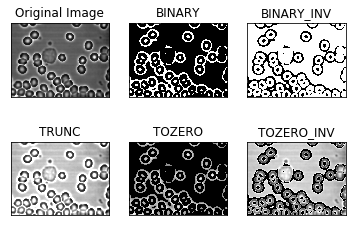

In [9]:
_, thresh1 = cv2.threshold(grayscale_img, 127, 255, cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(grayscale_img, 127, 255, cv2.THRESH_BINARY_INV)
_, thresh3 = cv2.threshold(grayscale_img, 127, 255, cv2.THRESH_TRUNC)
_, thresh4 = cv2.threshold(grayscale_img, 127, 255, cv2.THRESH_TOZERO)
_, thresh5 = cv2.threshold(grayscale_img, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [grayscale_img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

## 2. Adaptive Thresholding

A global value as threshold value may not be good in all the conditions where image has different lighting conditions in different areas. In that case, we go for adaptive thresholding. In this, the algorithm calculate the threshold for a small regions of the image. So we get different thresholds for different regions of the same image and it gives us better results for images with varying illumination.

It has three ‘special’ input params and only one output argument.

**Adaptive Method**— It decides how thresholding value is calculated:
* `cv2.ADAPTIVE_THRESH_MEAN_C` : threshold value is the mean of neighbourhood area;
* `cv2.ADAPTIVE_THRESH_GAUSSIAN_C` : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.

**Block Size** — It decides the size of neighbourhood area.

**C** — It is just a constant which is subtracted from the mean or weighted mean calculated.

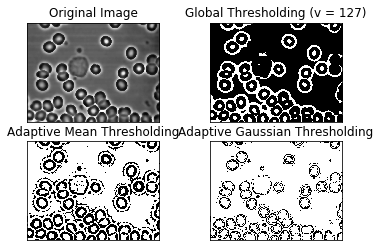

In [10]:
_, th1 = cv2.threshold(grayscale_img, 127, 255, cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(grayscale_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(grayscale_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY, 11, 2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [grayscale_img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

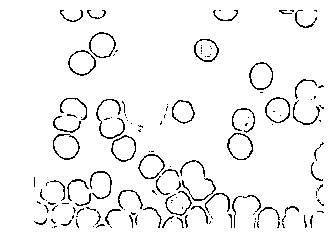

In [11]:
th = cv2.adaptiveThreshold(grayscale_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY, 11, 5)

plt.axis('off')
plt.imshow(th, 'gray')

## 3. Otsu’s Binarization

In the first section, I told you there is a second parameter `retVal`. Its use comes when we go for Otsu’s Binarization. So what is it?

In global thresholding, we used an arbitrary value for threshold value, right? So, how can we know a value we selected is good or not? Answer is, trial and error method. But consider a bimodal image (In simple words, bimodal image is an image whose histogram has two peaks). For that image, we can approximately take a value in the middle of those peaks as threshold value, right ? That is what Otsu binarization does. So in simple words, it automatically calculates a threshold value from image histogram for a bimodal image. (For images which are not bimodal, binarization won’t be accurate.)

For this, our cv2.threshold() function is used, but pass an extra flag, `cv2.THRESH_OTSU`. For threshold value, simply pass zero. Then the algorithm finds the optimal threshold value and returns you as the second output, retVal. If Otsu thresholding is not used, retVal is same as the threshold value you used.

Check out below example. Input image is a noisy image. In first case, I applied global thresholding for a value of 127. In second case, I applied Otsu’s thresholding directly. In third case, I filtered image with a 5x5 gaussian kernel to remove the noise, then applied Otsu thresholding. See how noise filtering improves the result.

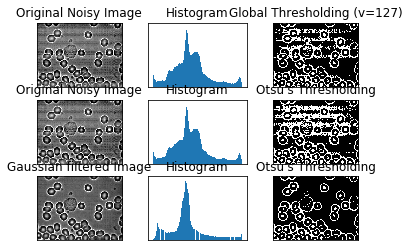

In [12]:
img = cv2.imread('images/1.jpg',0)

# global thresholding
_, th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
_, th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
_, th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

### Only Otsu

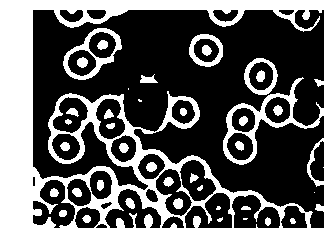

In [13]:
img = cv2.imread('images/1.jpg', 0)

_, th = cv2.threshold(grayscale_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.axis('off')
plt.imshow(th, 'gray')
plt.show()

### Blur + Grayscale + Otsu

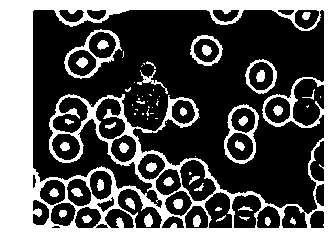

In [14]:
img = cv2.imread('images/1.jpg')

blur = cv2.medianBlur(img, 5)
grayscale_img = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)

_, th = cv2.threshold(grayscale_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.axis('off')
plt.imshow(th, 'gray')
plt.show()

### Grayscale + Blur + Otsu

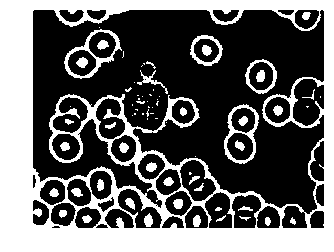

In [15]:
img = cv2.imread('images/1.jpg', 0)

blur = cv2.medianBlur(img, 5)

_, th = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.axis('off')
plt.imshow(th, 'gray')
plt.show()

### Blur combination (median + bilateral)

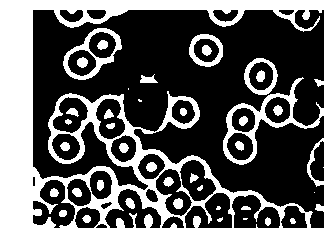

In [16]:
img = cv2.imread('images/1.jpg')

blur = cv2.medianBlur(img, 7)
blur = cv2.bilateralFilter(blur, 21, 255, 255)
grayscale_img = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)

_, th = cv2.threshold(grayscale_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.axis('off')
plt.imshow(th, 'gray')
plt.show()

# Canny Edge Detection

Canny Edge Detection is a popular edge detection algorithm.

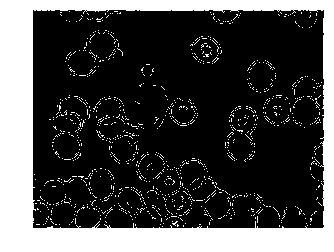

In [17]:
img = cv2.imread('images/1.jpg', 0)
img = cv2.medianBlur(img, 7)
edges = cv2.Canny(img, 100, 200)

plt.axis('off')
plt.imshow(edges, 'gray')

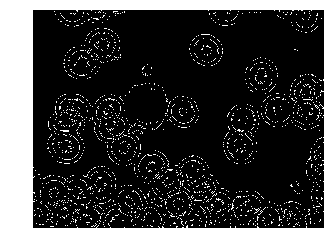

In [18]:
img = cv2.imread('images/1.jpg', 0)
blur = cv2.medianBlur(img, 7)
blur = cv2.bilateralFilter(blur, 21, 255, 255)

low_threshold = 10
edges = cv2.Canny(blur, low_threshold, min(low_threshold * 3, 255))

plt.axis('off')
plt.imshow(edges, 'gray')

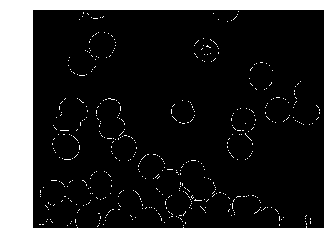

In [19]:
img = cv2.imread('images/1.jpg', 0)
blur = cv2.medianBlur(img, 7)
blur = cv2.bilateralFilter(blur, 21, 255, 255)

low_threshold = 45
edges = cv2.Canny(blur, low_threshold, min(low_threshold * 3, 255))

plt.axis('off')
plt.imshow(edges, 'gray')

# Hough Circle Transform

A circle is represented mathematically as $(x-x_{center})^2 + (y - y_{center})^2 = r^2$ where $(x_{center},y_{center})$ is the center of the circle, and $r$ is the radius of the circle. From equation, we can see we have 3 parameters, so we need a 3D accumulator for hough transform, which would be highly ineffective. So OpenCV uses more trickier method, Hough Gradient Method which uses the gradient information of edges.


* `HOUGH_GRADIENT`: Define the detection method. Currently this is the only one available in OpenCV.
* `dp = 1`: The inverse ratio of resolution.
* `min_dist = gray.rows/16`: Minimum distance between detected centers.
* `param_1 = 200`: Upper threshold for the internal Canny edge detector.
* `param_2 = 100*`: Threshold for center detection.
* `min_radius = 0`: Minimum radius to be detected. If unknown, put zero as default.
* `max_radius = 0`: Maximum radius to be detected. If unknown, put zero as default.


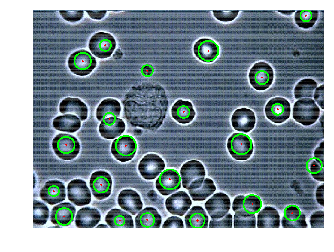

In [20]:
src = cv2.imread('images/1.jpg')

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 5)

rows = gray.shape[0]
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, rows / 8, 
                            param1=100,param2=30,minRadius=1,maxRadius=30) # param1=50, param2=30

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(src, center, 1, (0, 0, 255), 3)
        # circle outline
        radius = i[2]
        cv2.circle(src, center, radius, (0, 255, 0), 3)
    
plt.axis('off')
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))

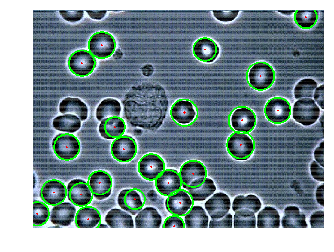

In [21]:
src = cv2.imread('images/1.jpg')

blur = cv2.medianBlur(src, 7)
blur = cv2.bilateralFilter(blur, 21, 255, 255)
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)

rows = gray.shape[0]
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, rows / 10, 
                            param1=100,param2=30,minRadius=1,maxRadius=50)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(src, center, 1, (0, 0, 255), 3)
        # circle outline
        radius = i[2]
        cv2.circle(src, center, radius, (0, 255, 0), 3)
    
plt.axis('off')
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))

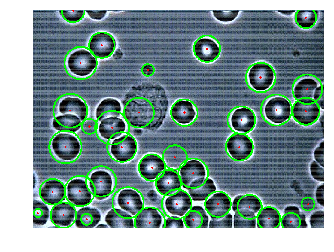

In [22]:
src = cv2.imread('images/1.jpg')

blur = cv2.medianBlur(src, 7)
blur = cv2.bilateralFilter(blur, 21, 255, 255)
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)

rows = gray.shape[0]
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, rows / 10, 
                            param1=10,param2=30,minRadius=1,maxRadius=50)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(src, center, 1, (0, 0, 255), 3)
        # circle outline
        radius = i[2]
        cv2.circle(src, center, radius, (0, 255, 0), 3)
    
plt.axis('off')
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))

# Image Gradients

All kernels are of 5x5 size. Depth of output image is passed -1 to get the result in np.uint8 type.

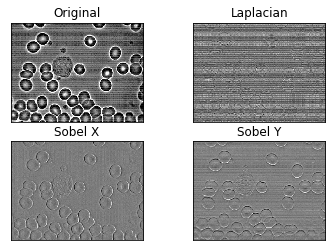

In [23]:
img = cv2.imread('images/1.jpg', 0)

laplacian = cv2.Laplacian(img, cv2.CV_64F)
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)

plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 3), plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 4), plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

In last example, output datatype is `cv2.CV_8U` or `np.uint8`. But there is a slight problem with that. Black-to-White transition is taken as Positive slope (it has a positive value) while White-to-Black transition is taken as a Negative slope (It has negative value). So when you convert data to np.uint8, all negative slopes are made zero. In simple words, you miss that edge.

If you want to detect both edges, better option is to keep the output datatype to some higher forms, like `cv2.CV_16S`, `cv2.CV_64F` etc, take its absolute value and then convert back to `cv2.CV_8U`. Below code demonstrates this procedure for a horizontal Sobel filter and difference in results.

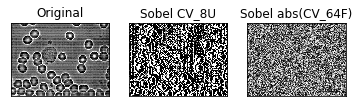

In [24]:
img = cv2.imread('images/1.jpg', 0)

# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img, cv2.CV_8U, 1, 0, ksize=5)

# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 2), plt.imshow(sobelx8u, cmap='gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 3), plt.imshow(sobel_8u, cmap='gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])

plt.show()

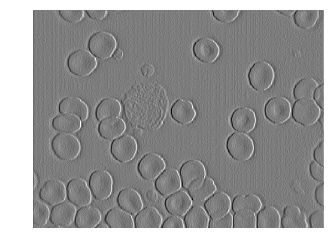

In [25]:
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)

plt.axis('off')
plt.imshow(sobelx, cmap='gray')

## Sobel X and Y

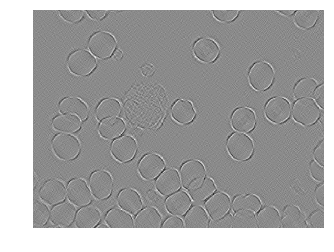

In [26]:
src = cv2.imread('images/1.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
sobel = cv2.Sobel(sobel, cv2.CV_64F, 0, 1, ksize=5)
plt.axis('off')
plt.imshow(sobel, cmap='gray')

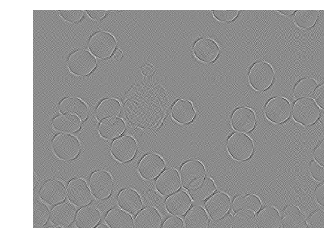

In [27]:
src = cv2.imread('images/1.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 1, ksize=5)
plt.axis('off')
plt.imshow(sobel, cmap='gray')

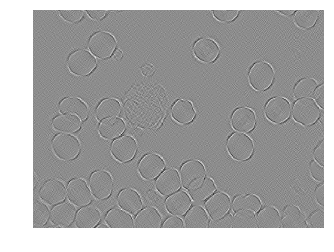

In [28]:
src = cv2.imread('images/1.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 1, ksize=7)
plt.axis('off')
plt.imshow(sobel, cmap='gray')

## Sobel + ConvertScaleAbs

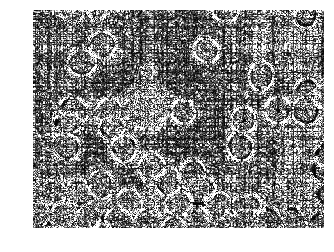

In [29]:
src = cv2.imread('images/1.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 1, ksize=5)
scale = cv2.convertScaleAbs(sobel)

plt.axis('off')
plt.imshow(scale, 'gray')

## GaussianBlur + Sobel + ConvertScaleAbs

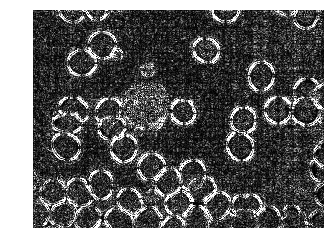

In [30]:
src = cv2.imread('images/1.jpg')
blur = cv2.GaussianBlur(src, (5,5), 0)
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 1, ksize=5)
scale = cv2.convertScaleAbs(sobel)

plt.axis('off')
plt.imshow(scale, 'gray')

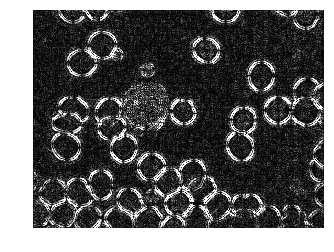

In [31]:
src = cv2.imread('images/1.jpg')
blur = cv2.GaussianBlur(src, (7,7), 0)
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 1, ksize=5)
scale = cv2.convertScaleAbs(sobel)

plt.axis('off')
plt.imshow(scale, 'gray')

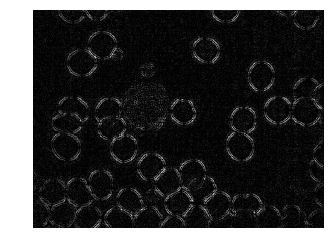

In [32]:
src = cv2.imread('images/1.jpg')
blur = cv2.GaussianBlur(src, (7,7), 0)
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 1, ksize=3)
scale = cv2.convertScaleAbs(sobel)

plt.axis('off')
plt.imshow(scale, 'gray')

## BilateralFilter + Sobel + ConvertScaleAbs + AddWeighted

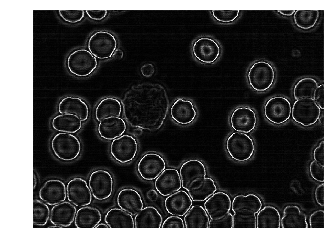

In [33]:
src = cv2.imread('images/1.jpg')
blur = cv2.bilateralFilter(src, 15, 255, 255)
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobelx_scale = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobely_scale = cv2.convertScaleAbs(sobely)

grade_weighted = cv2.addWeighted(sobelx_scale, 0.5, sobely_scale, 0.5, 0)
plt.axis('off')
plt.imshow(grade_weighted, cmap='gray')

## GaussianBlur + Sobel + ConvertScaleAbs + AddWeighted

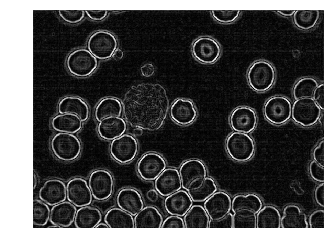

In [34]:
src = cv2.imread('images/1.jpg')
blur = cv2.GaussianBlur(src, (7,7), 0)
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobelx_scale = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobely_scale = cv2.convertScaleAbs(sobely)

result = cv2.addWeighted(sobelx_scale, 0.5, sobely_scale, 0.5, 0)
plt.axis('off')
plt.imshow(result, cmap='gray')

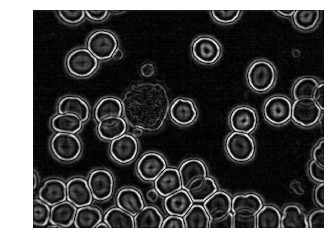

In [35]:
src = cv2.imread('images/1.jpg')
blur = cv2.GaussianBlur(src, (15,15), 0)
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobelx_scale = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobely_scale = cv2.convertScaleAbs(sobely)

grade_weighted = cv2.addWeighted(sobelx_scale, 0.5, sobely_scale, 0.5, 0)
plt.axis('off')
plt.imshow(grade_weighted, cmap='gray')

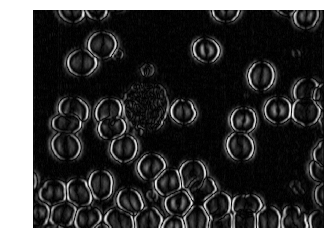

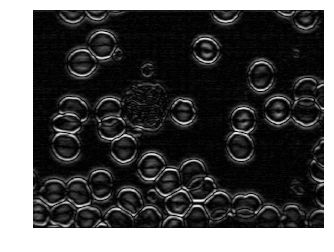

In [36]:
plt.axis('off')
plt.imshow(sobelx_scale, cmap='gray')
plt.figure()
plt.axis('off')
plt.imshow(sobely_scale, cmap='gray')
plt.show()

## HoughCircles

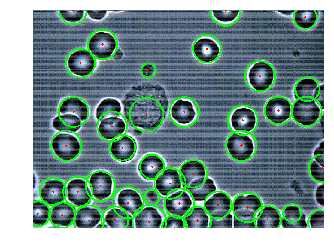

In [37]:
src = cv2.imread('images/1.jpg')
grade_weighted = grade_weighted.copy()

rows = grade_weighted.shape[0]
circles = cv2.HoughCircles(grade_weighted, cv2.HOUGH_GRADIENT, 1, rows / 10, 
                           param1=100, param2=30, minRadius=15, maxRadius=50)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(src, center, 1, (0, 0, 255), 3)
        # circle outline
        radius = i[2]
        cv2.circle(src, center, radius, (0, 255, 0), 3)
    
plt.axis('off')
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))

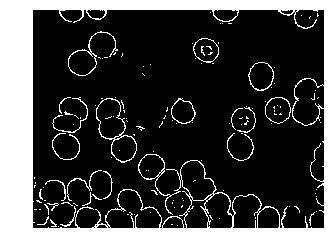

In [38]:
src = cv2.imread('images/1.jpg')
blur = cv2.bilateralFilter(src, 15, 255, 255)
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobelx_scale = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobely_scale = cv2.convertScaleAbs(sobely)

grade_weighted = cv2.addWeighted(sobelx_scale, 0.5, sobely_scale, 0.5, 0)

_, th = cv2.threshold(grade_weighted, 50, 100, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.axis('off')
plt.imshow(th, 'gray')

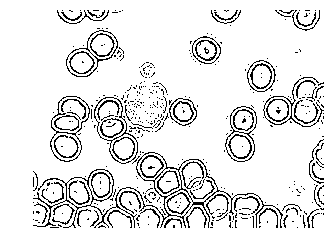

In [39]:
src = cv2.imread('images/1.jpg')
blur = cv2.GaussianBlur(src, (15,15), 0)
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobelx_scale = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobely_scale = cv2.convertScaleAbs(sobely)

grade_weighted = cv2.addWeighted(sobelx_scale, 0.5, sobely_scale, 0.5, 0)
grade_weighted_blur = cv2.GaussianBlur(grade_weighted, (5,5), 0)
th = cv2.adaptiveThreshold(grade_weighted_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 11, 5)

plt.axis('off')
plt.imshow(th, 'gray')

# Contours 

## FindContours and DrawContours

Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition.

* For better accuracy, use binary images. So before finding contours, apply threshold or canny edge detection.
* `findContours` function modifies the source image. So if you want source image even after finding contours, already store it to some other variables.
* In OpenCV, finding contours is like finding white object from black background. So remember, object to be found should be white and background should be black.

There are three arguments in `cv2.findContours()` function, first one is source image, second is contour retrieval mode, third is contour approximation method. And it outputs the contours and hierarchy. contours is a Python list of all the contours in the image. Each individual contour is a Numpy array of (x,y) coordinates of boundary points of the object.

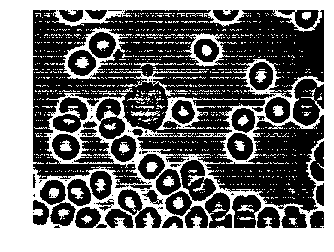

In [40]:
img = cv2.imread('images/1.jpg')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(imgray, 127, 255, 0)

plt.axis('off')
plt.imshow(thresh, 'gray')

To draw the contours, `cv2.drawContours` function is used. It can also be used to draw any shape provided you have its boundary points. Its first argument is source image, second argument is the contours which should be passed as a Python list, third argument is index of contours (useful when drawing individual contour. To draw all contours, pass -1) and remaining arguments are color, thickness etc.

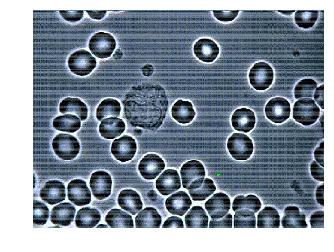

In [41]:
img = cv2.imread('images/1.jpg')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contour_image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cnt = contours[1234]
cv2.drawContours(img, [cnt], 0, (0,255,0), 3)

plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### 1. Moments

Image moments help you to calculate some features like center of mass of the object, area of the object etc. 
The function `cv2.moments()` gives a dictionary of all moment values calculated.

From this moments, you can extract useful data like area, centroid etc. Centroid is given by the relations, $C_x = \frac{M_{10}}{M_{00}}$ and $C_y = \frac{M_{01}}{M_{00}}$. 

### 2. Contour Area

Contour area is given by the function `cv2.contourArea()` or from moments, `M[‘m00’]`.

### 3. Contour Perimeter

It is also called arc length. It can be found out using `cv2.arcLength()` function. Second argument specify whether shape is a closed contour (if passed `True`), or just a curve.

### 4. Contour Approximation

It approximates a contour shape to another shape with less number of vertices depending upon the precision we specify. It is an implementation of Douglas-Peucker algorithm. 

To understand this, suppose you are trying to find a square in an image, but due to some problems in the image, you didn’t get a perfect square, but a “bad shape”. Now you can use this function to approximate the shape. In this, second argument is called `epsilon`, which is maximum distance from contour to approximated contour. It is an accuracy parameter. A wise selection of `epsilon` is needed to get the correct output.

### 5. Convex Hull

Convex Hull will look similar to contour approximation, but it is not (Both may provide same results in some cases). Here, `cv2.convexHull()` function checks a curve for convexity defects and corrects it. Generally speaking, convex curves are the curves which are always bulged out, or at-least flat. And if it is bulged inside, it is called convexity defects.

### 6. Checking Convexity

There is a function to check if a curve is convex or not, `cv2.isContourConvex()`. It just return whether `True` or `False`.

### 7. Bounding Rectangle

#### 7.1. Straight Bounding Rectangle

It is a straight rectangle, it doesn’t consider the rotation of the object. So area of the bounding rectangle won’t be minimum. It is found by the function `cv2.boundingRect()`. Let (x,y) be the top-left coordinate of the rectangle and (w,h) be its width and height.

```python
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(img,[box],0,(0,0,255),2)
```

Let (x,y) be the top-left coordinate of the rectangle and (w,h) be its width and height.

#### 7.2. Rotated Rectangle

Here, bounding rectangle is drawn with minimum area, so it considers the rotation also. The function used is `cv2.minAreaRect()`. It returns a Box2D structure which contains following detals - ( center (x,y), (width, height), angle of rotation ). But to draw this rectangle, we need 4 corners of the rectangle. It is obtained by the function `cv2.boxPoints()`.

```python
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(img,[box],0,(0,0,255),2)
```

### 8. Minimum Enclosing Circle

Next we find the circumcircle of an object using the function cv2.minEnclosingCircle(). It is a circle which completely covers the object with minimum area.

```python
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
cv2.circle(img,center,radius,(0,255,0),2)
```

### 9. Fitting an Ellipse

Next one is to fit an ellipse to an object. It returns the rotated rectangle in which the ellipse is inscribed.

```python
ellipse = cv2.fitEllipse(cnt)
cv2.ellipse(img,ellipse,(0,255,0),2)
```

### 10. Fitting a Line

Similarly we can fit a line to a set of points. Below image contains a set of white points. We can approximate a straight line to it.

```python
rows,cols = img.shape[:2]
[vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
cv2.line(img,(cols-1,righty),(0,lefty),(0,255,0),2)
```

In [42]:
cnt = contours[1234]
M = cv2.moments(cnt)
print(M)

# cx = int(M['m10']/M['m00'])
# cy = int(M['m01']/M['m00'])

area = cv2.contourArea(cnt)
print(area)

perimeter = cv2.arcLength(cnt,True)
print(perimeter)

epsilon = 0.1 * cv2.arcLength(cnt, True)
approx = cv2.approxPolyDP(cnt,epsilon, True)

hull = cv2.convexHull(cnt)

k = cv2.isContourConvex(cnt)

{'m00': 0.0, 'm10': 0.0, 'm01': 0.0, 'm20': 0.0, 'm11': 0.0, 'm02': 0.0, 'm30': 0.0, 'm21': 0.0, 'm12': 0.0, 'm03': 0.0, 'mu20': 0.0, 'mu11': 0.0, 'mu02': 0.0, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.0, 'nu11': 0.0, 'nu02': 0.0, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}
0.0
8.0


## Contour Properties

### 1. Aspect Ratio

It is the ratio of width to height of bounding rect of the object: $Aspect \; Ratio = \frac{Width}{Height}$

```python
x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h
```

### 2. Extent

Extent is the ratio of contour area to bounding rectangle area: $Extent = \frac{Object \; Area}{Bounding \; Rectangle \; Area}$

```python
area = cv2.contourArea(cnt)
x,y,w,h = cv2.boundingRect(cnt)
rect_area = w*h
extent = float(area)/rect_area
```

### 3. Solidity

Solidity is the ratio of contour area to its convex hull area: $Solidity = \frac{Contour \; Area}{Convex \; Hull \; Area}$

```python
area = cv2.contourArea(cnt)
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
solidity = float(area)/hull_area
```

### 4. Equivalent Diameter

Equivalent Diameter is the diameter of the circle whose area is same as the contour area: $Equivalent \; Diameter = \sqrt{\frac{4 \times Contour \; Area}{\pi}}$

```python
area = cv2.contourArea(cnt)
equi_diameter = np.sqrt(4*area/np.pi)
```

### 5. Orientation

Orientation is the angle at which object is directed. Following method also gives the Major Axis and Minor Axis lengths.

```python
(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)
```

### 6. Mask and Pixel Points

In some cases, we may need all the points which comprises that object. It can be done as follows:

```python
(mask = np.zeros(imgray.shape,np.uint8)
cv2.drawContours(mask,[cnt],0,255,-1)
pixelpoints = np.transpose(np.nonzero(mask))
#pixelpoints = cv2.findNonZero(mask)
```

Here, two methods, one using Numpy functions, next one using OpenCV function (last commented line) are given to do the same. Results are also same, but with a slight difference. Numpy gives coordinates in (row, column) format, while OpenCV gives coordinates in (x,y) format. So basically the answers will be interchanged. Note that, row = x and column = y.

### 7. Maximum Value, Minimum Value and their locations

We can find these parameters using a mask image.

```python
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(imgray,mask = mask)
```

### 8. Mean Color or Mean Intensity

Here, we can find the average color of an object. Or it can be average intensity of the object in grayscale mode. We again use the same mask to do it.

```python
mean_val = cv2.mean(im,mask = mask)
```

### 9. Extreme Points

Extreme Points means topmost, bottommost, rightmost and leftmost points of the object.

```python
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])
```

### 10. Other

<https://in.mathworks.com/help/images/ref/regionprops.html>

## Contours : More Functions

<https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_contours/py_contours_more_functions/py_contours_more_functions.html#contours-more-functions>

## Contours Hierarchy

<https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_contours/py_contours_hierarchy/py_contours_hierarchy.html#contours-hierarchy>